In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name !='/device:GPU:0':
  raise SystemError("Gpu not")
print('Gpu found at {} '.format(device_name))

Gpu found at /device:GPU:0 


In [ ]:
import pickle
import numpy as np

In [ ]:
%cd /content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet/
!ls

/content/gdrive/MyDrive/Master/Fall 22/DS Project/CornDataSet
MobileNet_100epoch_1fold_no_accuracyGraph.png  MobileNet_Kfold_history_2.csv
MobileNet_100epoch_1fold_no_LossGraph.png      MobileNet_Kfold_history_3.csv
MobileNet_100epoch_2fold_no_accuracyGraph.png  MobileNet_Kfold_history_4.csv
MobileNet_100epoch_2fold_no_LossGraph.png      MobileNet_Kfold_history_5.csv
MobileNet_100epoch_3fold_no_accuracyGraph.png  Testing
MobileNet_100epoch_3fold_no_LossGraph.png      Training
MobileNet_100epoch_4fold_no_accuracyGraph.png  X_test.pickle
MobileNet_100epoch_4fold_no_LossGraph.png      X_train.pickle
MobileNet_100epoch_5fold_no_accuracyGraph.png  Y_test.pickle
MobileNet_100epoch_5fold_no_LossGraph.png      Y_train.pickle
MobileNet_Kfold_history_1.csv


In [ ]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

pickle_in = open("Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

In [ ]:
y = np.array(Y_train)

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import classification_report
from keras.layers.core import Dense, Flatten
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras import optimizers

import matplotlib.pyplot as plt
import keras.optimizers
import numpy as np
import pandas as pd

In [ ]:
#tensorboard = TensorBoard(log_dir=logs , histogram_freq=0,
 #                         write_graph=True, write_images=False)
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logs, histogram_freq=1)
#tb = TensorBoard(logs)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
def plotGraphs(history,fold_no,epochs):
  %cd '/content/gdrive/MyDrive/Graphs/'
 #summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'{fold_no} model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'Vgg16_{epochs}epoch_{fold_no}fold_no_accuracyGraph.png')
  plt.show()
  #summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'{fold_no} model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(f'Vgg16_{epochs}epoch_{fold_no}fold_no_LossGraph.png')
  plt.show()

553467096/553467096 [==============================] - 6s 0us/step
Epoch 1/100
73/73 [==============================] - 33s 294ms/step - loss: 7.9039 - accuracy: 0.5121 - val_loss: 1.3082 - val_accuracy: 0.5948
Epoch 2/100
73/73 [==============================] - 18s 254ms/step - loss: 3.4347 - accuracy: 0.5541 - val_loss: 1.3821 - val_accuracy: 0.4636
Epoch 3/100
73/73 [==============================] - 20s 278ms/step - loss: 15.2072 - accuracy: 0.4680 - val_loss: 24.2947 - val_accuracy: 0.3143
Epoch 4/100
73/73 [==============================] - 20s 281ms/step - loss: 3.2580 - accuracy: 0.4216 - val_loss: 1.1727 - val_accuracy: 0.4351
Epoch 5/100
73/73 [==============================] - 19s 263ms/step - loss: 1.2655 - accuracy: 0.3502 - val_loss: 1.3088 - val_accuracy: 0.3429
Epoch 6/100
73/73 [==============================] - 20s 269ms/step - loss: 1.2358 - accuracy: 0.4203 - val_loss: 1.2809 - val_accuracy: 0.3571
Epoch 7/100
73/73 [==============================] - 20s 270ms/step

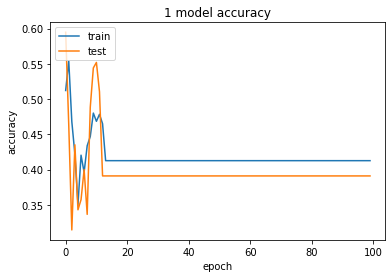

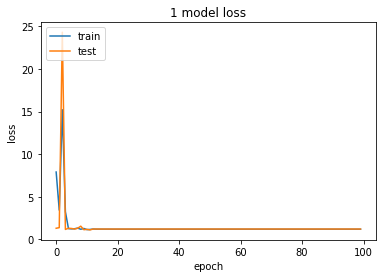

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 1: loss of 1.1830668449401855; accuracy of 42.04545319080353%
49/49 [==============================] - 19s 294ms/step
Classification report on Training data fold-1:
              precision    recall  f1-score   support

           0       0.34      1.00      0.50       928
           1       1.00      0.34      0.51       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.41      3080
   macro avg       0.33      0.34      0.25      3080
weighted avg       0.41      0.41      0.31      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 372ms/step
Classification report on Test data:-1
              precision    recall  f1-score   support

           0       0.34      1.00      0.51       234
           1       1.00      0.34      0.51       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.41       772
   macro avg       0.33      0.34      0.25       772
weighted avg       0.41      0.41      0.31       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 20s 273ms/step - loss: 10.6499 - accuracy: 0.4234 - val_loss: 1.0238 - val_accuracy: 0.5455
Epoch 2/100
73/73 [==============================] - 20s 270ms/step - loss: 2.5850 - accuracy: 0.5117 - val_loss: 1.2195 - val_accuracy: 0.4273
Epoch 3/100
73/73 [==============================] - 21s 286ms/step - loss: 2.3130 - accuracy: 0.3476 - val_loss: 1.3789 - val_accuracy: 0.2896
Epoch 4/100
73/73 [==============================] - 21s 286ms/step - loss: 1.3732 - accuracy: 0.3052 - val_loss: 1.3718 - val_accuracy: 0.2896
Epoch 5/100
73/73 [==============================] - 19s 267ms/step - loss: 1.3659 - accuracy: 0.3052 - val_loss: 1.3667 - val_accuracy: 0.2896
Epoch 6/100
73/73 [==============================] - 21s 287ms/step - loss: 1.3599 - accuracy: 0.3052 - val_loss: 1.3626 - val_accuracy: 0.2896
Epoch 7/100
73/73 [==============================] - 19s 266ms/step - loss: 1.3550 - accuracy: 0.3052 - val_loss: 1.3594 - val_accuracy

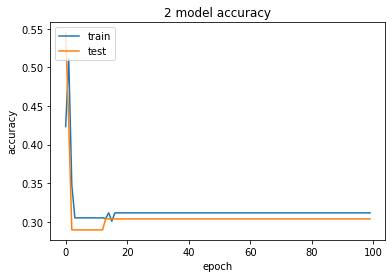

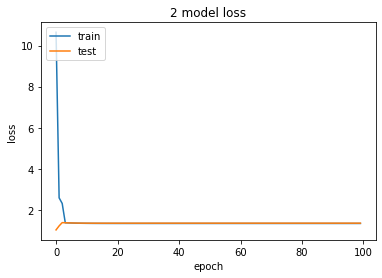

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 2: loss of 1.348402500152588; accuracy of 30.519479513168335%
49/49 [==============================] - 14s 297ms/step
Classification report on Training data fold-2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       928
           1       0.31      1.00      0.47       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.31      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.10      0.31      0.15      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 304ms/step
Classification report on Test data:-2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.31      1.00      0.47       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.31       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.10      0.31      0.15       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 21s 278ms/step - loss: 8.7745 - accuracy: 0.4104 - val_loss: 1.5649 - val_accuracy: 0.3312
Epoch 2/100
73/73 [==============================] - 20s 269ms/step - loss: 1.1528 - accuracy: 0.5792 - val_loss: 1.5535 - val_accuracy: 0.5792
Epoch 3/100
73/73 [==============================] - 21s 285ms/step - loss: 2.6115 - accuracy: 0.4762 - val_loss: 4.4058 - val_accuracy: 0.2974
Epoch 4/100
73/73 [==============================] - 19s 265ms/step - loss: 1.7716 - accuracy: 0.3398 - val_loss: 1.3737 - val_accuracy: 0.3026
Epoch 5/100
73/73 [==============================] - 21s 289ms/step - loss: 1.4858 - accuracy: 0.4485 - val_loss: 1.2437 - val_accuracy: 0.4195
Epoch 6/100
73/73 [==============================] - 21s 288ms/step - loss: 7.0868 - accuracy: 0.4797 - val_loss: 18.7962 - val_accuracy: 0.1870
Epoch 7/100
73/73 [==============================] - 19s 267ms/step - loss: 2.0075 - accuracy: 0.3385 - val_loss: 1.4504 - val_accuracy

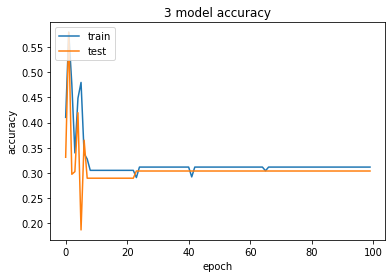

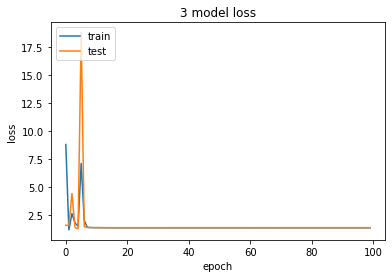

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 3: loss of 1.3378137350082397; accuracy of 27.4350643157959%
49/49 [==============================] - 14s 295ms/step
Classification report on Training data fold-3:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       928
           1       0.31      1.00      0.47       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.31      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.10      0.31      0.15      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 301ms/step
Classification report on Test data:-3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.31      1.00      0.47       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.31       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.10      0.31      0.15       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 22s 298ms/step - loss: 4.4535 - accuracy: 0.4268 - val_loss: 6.2553 - val_accuracy: 0.5688
Epoch 2/100
73/73 [==============================] - 21s 289ms/step - loss: 2.0244 - accuracy: 0.4381 - val_loss: 1.3798 - val_accuracy: 0.2909
Epoch 3/100
73/73 [==============================] - 21s 287ms/step - loss: 1.8334 - accuracy: 0.3203 - val_loss: 1.3769 - val_accuracy: 0.2896
Epoch 4/100
73/73 [==============================] - 21s 288ms/step - loss: 1.3712 - accuracy: 0.3052 - val_loss: 1.3706 - val_accuracy: 0.2896
Epoch 5/100
73/73 [==============================] - 21s 290ms/step - loss: 1.3641 - accuracy: 0.3052 - val_loss: 1.3656 - val_accuracy: 0.2896
Epoch 6/100
73/73 [==============================] - 21s 288ms/step - loss: 1.3586 - accuracy: 0.3052 - val_loss: 1.3618 - val_accuracy: 0.2896
Epoch 7/100
73/73 [==============================] - 20s 269ms/step - loss: 1.3541 - accuracy: 0.3052 - val_loss: 1.3587 - val_accuracy:

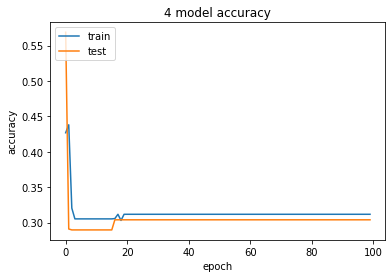

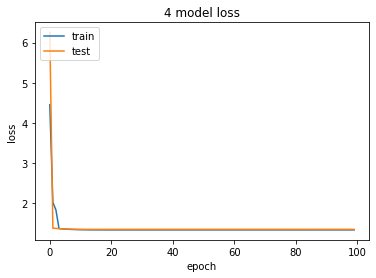

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 4: loss of 1.3382160663604736; accuracy of 33.60389471054077%
49/49 [==============================] - 15s 305ms/step
Classification report on Training data fold-4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       928
           1       0.31      1.00      0.47       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.31      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.10      0.31      0.15      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 301ms/step
Classification report on Test data:-4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.31      1.00      0.47       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.31       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.10      0.31      0.15       772



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/100
73/73 [==============================] - 22s 296ms/step - loss: 11.3072 - accuracy: 0.3996 - val_loss: 1.0037 - val_accuracy: 0.5584
Epoch 2/100
73/73 [==============================] - 20s 273ms/step - loss: 1.2824 - accuracy: 0.5320 - val_loss: 2.8692 - val_accuracy: 0.3143
Epoch 3/100
73/73 [==============================] - 20s 269ms/step - loss: 1.0552 - accuracy: 0.6965 - val_loss: 1.0858 - val_accuracy: 0.7377
Epoch 4/100
73/73 [==============================] - 21s 288ms/step - loss: 0.7112 - accuracy: 0.7519 - val_loss: 1.4659 - val_accuracy: 0.7571
Epoch 5/100
73/73 [==============================] - 20s 270ms/step - loss: 0.6329 - accuracy: 0.7810 - val_loss: 2.3497 - val_accuracy: 0.8078
Epoch 6/100
73/73 [==============================] - 21s 289ms/step - loss: 0.6270 - accuracy: 0.7913 - val_loss: 1.4693 - val_accuracy: 0.7909
Epoch 7/100
73/73 [==============================] - 21s 289ms/step - loss: 0.5458 - accuracy: 0.7983 - val_loss: 0.8697 - val_accuracy

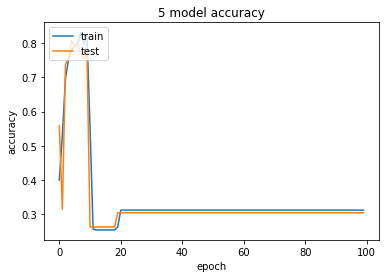

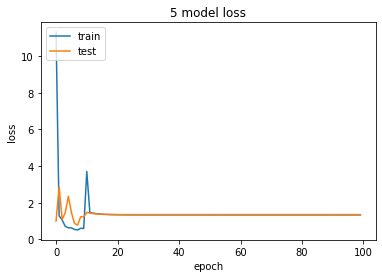

[Errno 2] No such file or directory: 'f/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_100/'
/content/gdrive/MyDrive/Graphs
Score for fold 5: loss of 1.3395752906799316; accuracy of 31.006494164466858%
49/49 [==============================] - 15s 302ms/step
Classification report on Training data fold-5:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       928
           1       0.31      1.00      0.47       954
           2       0.00      0.00      0.00       410
           3       0.00      0.00      0.00       788

    accuracy                           0.31      3080
   macro avg       0.08      0.25      0.12      3080
weighted avg       0.10      0.31      0.15      3080

 1/13 [=>............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13/13 [==============================] - 4s 309ms/step
Classification report on Test data:-5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.31      1.00      0.47       238
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00       197

    accuracy                           0.31       772
   macro avg       0.08      0.25      0.12       772
weighted avg       0.10      0.31      0.15       772

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Validation Loss: 1.1830668449401855 - Validation Accuracy: 42.04545319080353%
------------------------------------------------------------------------
> Fold 2 - Validation Loss: 1.348402500152588 - Validation Accuracy: 30.519479513168335%
------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
inputs = X_train
targets = y
acc_per_fold = []
loss_per_fold = []
num_folds = 5
epochs = 100

kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(inputs, targets):
  vgg16_model = vgg16.VGG16(weights='imagenet')
  model = Sequential()

  for layer in vgg16_model.layers[:-3]:
      model.add(layer) 

  for layer in model.layers[0:int(len(model.layers)/2)]:
    layer.trainable = False  # should be False

  for layer in model.layers[int(len(model.layers)/2):]:
    layer.trainable = True  # should be True
    
  model.add(Dense(4,activation = 'softmax'))  
  optm = optimizers.Adam(learning_rate=0.001)
  model.compile(loss='sparse_categorical_crossentropy',
              optimizer= optm,
              metrics=['accuracy']
              )
  
  logs = f'/content/gdrive/MyDrive/Logs/VGG16/vgg16_{epochs}/fold_no_{fold_no}/'
  
  history = model.fit(inputs, targets, batch_size=32, epochs=epochs, validation_split=0.25, callbacks= [TensorBoard
                          (log_dir=logs , histogram_freq=0,
                          write_graph=True, write_images=False),],
                          use_multiprocessing=True)
  
  plotGraphs(history,fold_no,epochs)
  
  %cd f'/content/gdrive/MyDrive/Logs/ExcelLogs/Vgg16_{epochs}/'

  hist_df = pd.DataFrame(history.history)  
  hist_csv_file = f'VGG16_history_{fold_no}.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  y_train_pred = model.predict(X_train, batch_size=64, verbose=1)
  y_train_pred_bool = np.argmax(y_train_pred, axis=1)
  print(f"Classification report on Training data fold-{fold_no}:")
  print(classification_report(y, y_train_pred_bool))

  y_pred = model.predict(X_test, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  print(f"Classification report on Test data:-{fold_no}")
  print(classification_report(Y_test, y_pred_bool))

  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Validation Loss: {loss_per_fold[i]} - Validation Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------') 